## Motivation

Learn Word2Vec as part of applied text analytics

## Goal
- Build a custom word vector

## Intuition

## Notebook

In [5]:
pip install --upgrade gensim

     |████████████████████████████████| 26.5 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 11.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
### Load Libraries
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from tqdm.notebook import tqdm
from gensim.models import Word2Vec

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [31]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [104]:
#Source: https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles?select=Articles.csv
df = pd.read_csv('./data/Articles.csv', encoding="ISO-8859-1") 


In [105]:
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [106]:
df.dropna(inplace = True)

In [208]:
# helper functions

# tokenize while removing stop words because they hold no value
def token_helper(doc):
    global stops
    payload = [word.lower() for word in word_tokenize(doc) if word not in stops and word.isalpha()]    
    return payload
    

In [209]:
## Pre-processing
"""
Tokenize and remove stop words and punctuation to help speed up processing.
"""

nltk_tokensized_bios = [token_helper(doc) for doc in tqdm(df.Article.values)]

  0%|          | 0/2692 [00:00<?, ?it/s]

In [238]:
# Build Word2Vec Model
model = Word2Vec(nltk_tokensized_bios, min_count = 100, vector_size = 100, seed = 42, window = 10, workers = 4)

In [240]:
# This is the vector representation of bank
model.wv['bank']

array([-0.16480975, -1.2655474 ,  0.8396033 , -1.9618269 , -0.40021282,
        0.9129871 , -0.7252716 , -1.1298832 ,  0.48269445,  0.12106826,
        0.8275659 , -0.01146987,  0.4527659 , -0.35710034,  0.728649  ,
       -1.3608395 ,  0.38667664,  0.57851124, -0.8117313 ,  1.5643364 ,
       -0.96986425, -1.2703695 ,  0.09804304, -0.18675378,  0.5171806 ,
        1.5526547 ,  0.2487312 ,  0.26353964,  1.2747232 , -2.094185  ,
        0.43116257,  0.24483475, -0.3172434 ,  0.47288573, -0.69638485,
        0.34344074, -0.33350506,  0.10438808,  0.67901945, -0.5035031 ,
        1.6654886 ,  1.0423291 , -0.53768164, -0.18889906,  0.4584986 ,
       -1.1323605 ,  1.151462  ,  0.7629481 ,  1.394136  , -0.26888996,
       -0.2442799 , -0.6989954 , -0.14736511, -0.44356528, -0.79327744,
        0.5964607 ,  0.9377676 , -0.5952289 , -0.00377276,  0.72922117,
        0.92948455,  0.7935503 , -0.67679214,  0.11432661,  0.23458467,
        0.03155258, -0.69851655,  0.9185853 , -0.0175481 ,  0.94

In [241]:
model.wv.similar_by_word('bank')

[('central', 0.9202344417572021),
 ('monetary', 0.8817926645278931),
 ('banks', 0.8781158328056335),
 ('policy', 0.8020472526550293),
 ('financial', 0.7769354581832886),
 ('fund', 0.7675600051879883),
 ('interest', 0.7497236132621765),
 ('rates', 0.7325248718261719),
 ('reserve', 0.7067981958389282),
 ('federal', 0.6986092329025269)]

In [242]:
model.wv.similar_by_word('economy')

[('growth', 0.93217533826828),
 ('outlook', 0.9212108850479126),
 ('economic', 0.8664448857307434),
 ('manufacturing', 0.8639830350875854),
 ('emerging', 0.8573724031448364),
 ('growing', 0.8323707580566406),
 ('boost', 0.8276666402816772),
 ('recent', 0.8040652871131897),
 ('financial', 0.7973530888557434),
 ('forecast', 0.7873972058296204)]

In [243]:
model.wv.similar_by_word('china')

[('chinese', 0.9012747406959534),
 ('investment', 0.8538748025894165),
 ('across', 0.8366903066635132),
 ('emerging', 0.8253678679466248),
 ('largest', 0.8149545788764954),
 ('beijing', 0.8146881461143494),
 ('region', 0.811974048614502),
 ('brazil', 0.8103609085083008),
 ('manufacturing', 0.8058189153671265),
 ('growing', 0.8018703460693359)]

In [244]:
# Vocabulary based on corpus
# model.wv.key_to_index


In [245]:
# Flatten Word Embeddings to 2-D for Visualizations

X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [246]:
result.shape

(856, 2)

In [247]:
len(model.wv.key_to_index)

856

In [248]:
def generate_fig(d, vocab):
    """
    d = 2-d vector
    vocab = list of vocab
    
    the lengths of both shoudl agree
    """
    plt.figure(figsize=(13,7))
    plt.scatter(d[:,0],d[:,1],linewidths=10,color='blue', alpha  = .1)
    plt.xlabel("PC1",size=15)
    plt.ylabel("PC2",size=15)
    plt.title("Word Embedding Space",size=20)
    for i, word in enumerate(vocab):
        plt.annotate(word,xy=(d[i,0],d[i,1]))
        

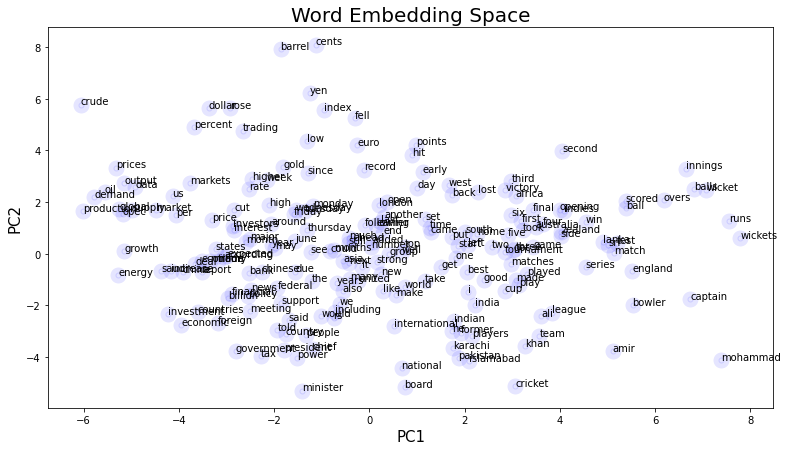

In [249]:
generate_fig(result[:200,:], list(model.wv.key_to_index)[:200])

In [250]:
# Vector space with 'similar words' against the word
def similar_words_vis(word):
    global model
    a = [i[0] for i in model.wv.similar_by_word(word)]
    results2 = pca.transform(model.wv[a])
    generate_fig(results2, a)

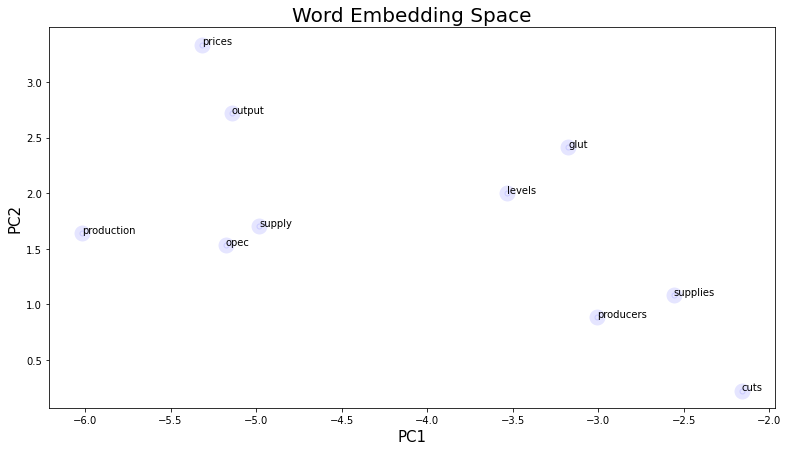

In [251]:
similar_words_vis('oil')

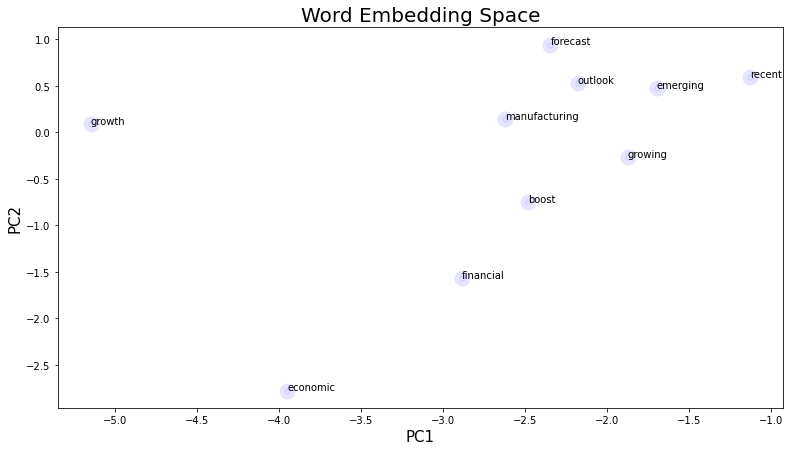

In [252]:
similar_words_vis('economy')

## Research and References
- https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial
- https://www.youtube.com/watch?v=viZrOnJclY0&t=2s&ab_channel=StatQuestwithJoshStarmer
- https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5
- https://towardsdatascience.com/word2vec-explained-49c52b4ccb71
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
- https://radimrehurek.com/gensim/models/word2vec.html
- https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354
  - for visualizations

Learned thus far:
- able to consume corpus, create a word2vect, utilize PCA to create visualizations.
- due to the window function, finding context among words is limited to 10. 

Looking ahead:
- Adopt n-grams
- Needing to make 